<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />MSc. Carsten Bauer</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Vorlesung &mdash; Programmiertechniken 8
</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2020</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2020-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2020-CompPhys.shtml)

**Themen dieses Notebooks:** Zufallszahlen in Julia, algorithmische Generatoren für Pseudo-Zufallszahlen, Korrelationen und Spektraltests

# Pseudo-Zufallszahlen

## 1. Zufallszahlen in Julia

### Gleichverteilte Pseudo-Zufallszahlen

In [1]:
rand()

0.7396566442184123

In [2]:
rand()

0.5606711507594

In [3]:
rand(5)

5-element Array{Float64,1}:
 0.21289223549760483
 0.5669280978056825
 0.8219557888772373
 0.45891822298246976
 0.918475661358783

In [4]:
using PyPlot

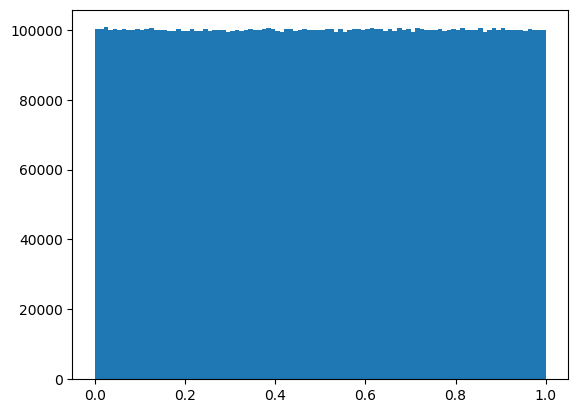

In [9]:
zufallszahlen = rand(10000000)
histogram = hist(zufallszahlen,100);

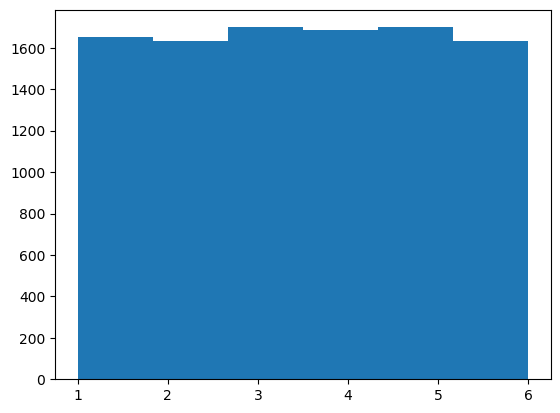

In [17]:
wuerfel = ceil.(rand(10000)*6)
histogram = hist(wuerfel,6);

In [25]:
matrix = rand(100,100);

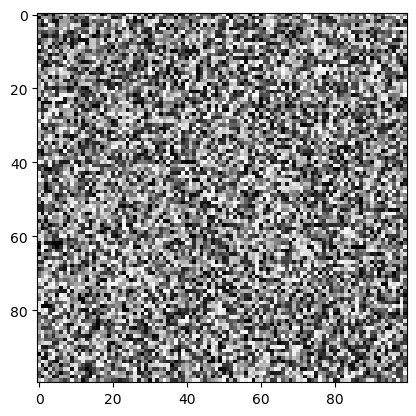

In [26]:
imshow(matrix, cmap="gray");

### Seeds &mdash; reproduzierbare Zufallszahlen

In [28]:
using Random

In [29]:
Random.seed!(22);

In [30]:
rand(5)

5-element Array{Float64,1}:
 0.4911584142585561
 0.11788508091973982
 0.048963108499195496
 0.44665159960473644
 0.9223476102531745

In [31]:
rand(5)

5-element Array{Float64,1}:
 0.7567239463041453
 0.6583972452158156
 0.5026114423592676
 0.5208478022691512
 0.035173665465731974

In [32]:
Random.seed!(22);

In [33]:
rand(5)

5-element Array{Float64,1}:
 0.4911584142585561
 0.11788508091973982
 0.048963108499195496
 0.44665159960473644
 0.9223476102531745

In [34]:
rand(5)

5-element Array{Float64,1}:
 0.7567239463041453
 0.6583972452158156
 0.5026114423592676
 0.5208478022691512
 0.035173665465731974

In [36]:
Random.seed!(178645);

In [37]:
rand(5)

5-element Array{Float64,1}:
 0.926538858241194
 0.8396030602866347
 0.30719483654008317
 0.28529162196681823
 0.19268784413040518

### Random devices für unabhängige Zufallszahlen in parallelen Rechnungen

In [38]:
rng1 = Random.RandomDevice()

RandomDevice(true)

In [39]:
rand(rng1, 10)

10-element Array{Float64,1}:
 0.8739635801672976
 0.5035294780090858
 0.4988888223526673
 0.4310961695978166
 0.3549474152387555
 0.9161786383131825
 0.41831275092079134
 0.27029605731206274
 0.32671940711903846
 0.6321184460638014

In [40]:
rng2 = Random.RandomDevice()

RandomDevice(true)

In [41]:
rand(rng2,10)

10-element Array{Float64,1}:
 0.09423206780358018
 0.31826819709576837
 0.8950663467842572
 0.15535579708987446
 0.5880126918343176
 0.2740220496617889
 0.6961523130373097
 0.5433241644793747
 0.12461955635925626
 0.9883064585966999

### Zufallszahlen Normalverteilung

In [50]:
normal = randn(10000000);

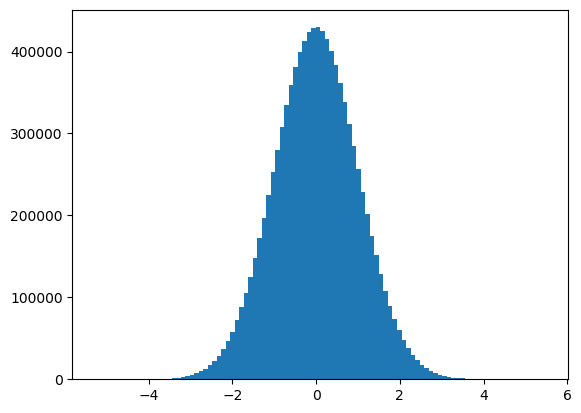

In [51]:
histogram = hist(normal,100);

### random strings

In [52]:
randstring()

"RUmFtyN6"

In [56]:
randstring("ACGT")

"TAGCCATT"

In [61]:
randstring("XYZ", 40)

"XZZXXYYZZZYXXYXYYYZZZZXZYXYYXXYYXYYZZXXZ"

<hr/>

## 2. Generatoren für Pseudo-Zufallszahlen

### Linearer kongruenter Generator

$\quad x_{n+1} = (a*x_n + c) \mod m$ (integer representation 0 ... m-1)

In [62]:
a = 16807
c = 0
m = 2^31-1;

In [63]:
function my_GGL(seed, n)
    x = [seed/m]
    for i in 1:n
        next = mod(a*x[i]*m + c, m)
        push!(x, next/m)
    end
    x[2:n+1]
end

my_GGL (generic function with 1 method)

In [64]:
my_GGL(123456, 10)

10-element Array{Float64,1}:
 0.9662122432916482
 0.12917300273160123
 0.01065691002209527
 0.11068674135522348
 0.31206195724100844
 0.8253153496285098
 0.07508120636561359
 0.8898353868677038
 0.46334708549623765
 0.4744659352663135

<hr/>

### Lagged Fibonacci Generator

$\quad x_{i+1} = (x_{i-p} + x_{i-q}) \mod m$ (integer representation 0 ... m-1)

In [65]:
p = 2281
q = 1252
m = 2^31-1;

In [68]:
function my_laggedFibonacci(seed, n)
    x = my_GGL(seed, max(p,q))
    
    for i in p+1:p+n
        next = mod(x[i-p]*m + x[i-q]*m, m)
        push!(x, next/m)
    end
    x[p+1:p+n]
end

my_laggedFibonacci (generic function with 1 method)

In [69]:
my_laggedFibonacci(123456, 10)

10-element Array{Float64,1}:
 0.32386213627598176
 0.1509243904249827
 0.5862298726844071
 0.7654702068302431
 0.25776619589598915
 0.2764544238885216
 0.3695022943822416
 0.2250616823341548
 0.6116949901381193
 0.7576992513713249

<hr/>

### Korrelierter Generator

In [70]:
function my_badgenerator(seed, n)
    x = [seed/m]
    for i in 1:n
        next = x[i] + 0.05*rand()
        if next>1 
            next = next - 1
        end
        push!(x, next)
    end
    x[2:n+1]
end

my_badgenerator (generic function with 1 method)

In [71]:
my_badgenerator(123456,10)

10-element Array{Float64,1}:
 0.002433271332857226
 0.015427637414940045
 0.03857175705285076
 0.05105888520496808
 0.06004083445751968
 0.09351880699138562
 0.09677011267741456
 0.11106129944516235
 0.12991468003900575
 0.16965982578723152

<hr/>

### Histogramme

In [72]:
x1 = my_GGL(123456, 10000000);
x2 = my_laggedFibonacci(123456, 10000000);
x3 = my_badgenerator(123456, 10000000);

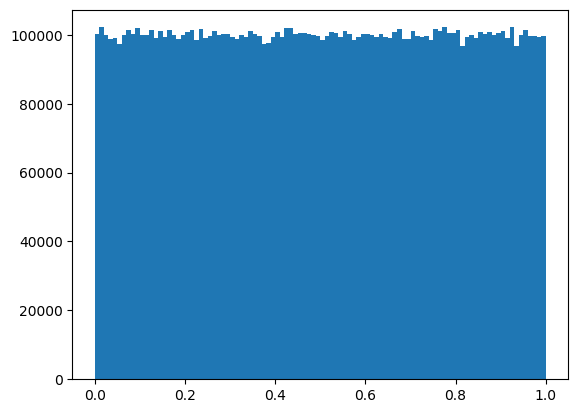

In [75]:
hist(x1,100);

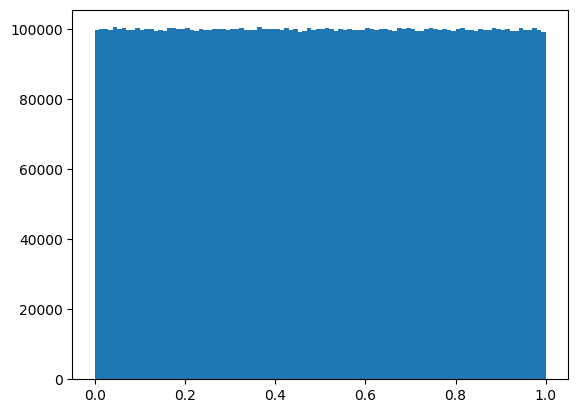

In [76]:
hist(x2,100);

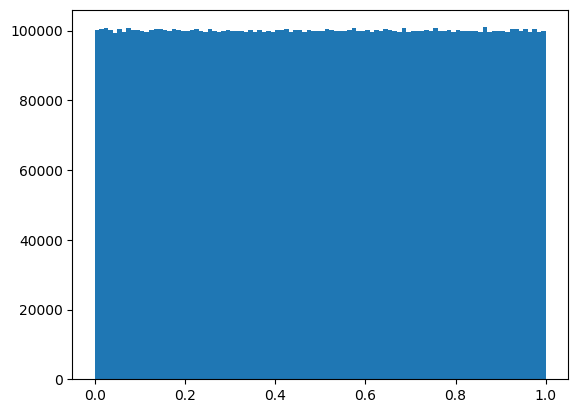

In [77]:
hist(x3,100);

<hr/>

### Korrelationen

$\quad \chi = \langle x_i \cdot x_{i+1} \rangle - \langle x_i \rangle^2$

In [78]:
function correlations(random_numbers)
    xx = 0
    for i in 1:length(random_numbers)-1
        xx += random_numbers[i] * random_numbers[i+1]
    end
    xx /= length(random_numbers)-1
    
    x = 0
    for i in 1:length(random_numbers)
        x += random_numbers[i] 
    end
    x /= length(random_numbers)

    χ = xx - x^2    
end

correlations (generic function with 1 method)

In [81]:
x1 = my_GGL(123456, 100000);
correlations(x1)

-6.334638104432688e-5

#### Korrelationsverlauf für GGL

In [82]:
corr = Float64[]
for i in 1:20
    n = 2^i
    x1 = my_GGL(123456, n)
    c = correlations(x1)
    push!(corr,c)
end

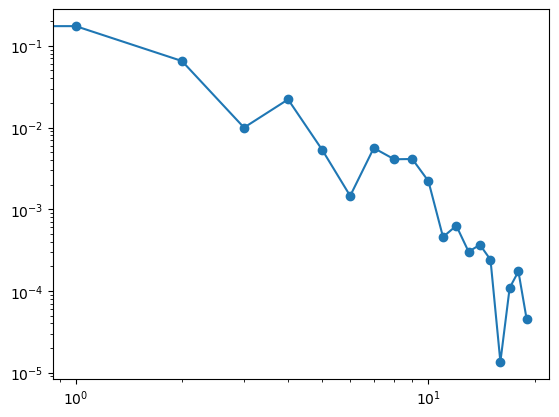

In [83]:
loglog(abs.(corr), marker="o");

#### Korrelationsverlauf für lagged Fibonacci (und den Standard Mersenne-Twister)

In [84]:
corr2 = Float64[]
for i in 1:20
    n = 2^i
    x1 = my_laggedFibonacci(123456, n)
    c = correlations(x1)
    push!(corr2,c)
end

In [85]:
corr3 = Float64[]
for i in 1:20
    n = 2^i
    x1 = rand(n)
    c = correlations(x1)
    push!(corr3,c)
end

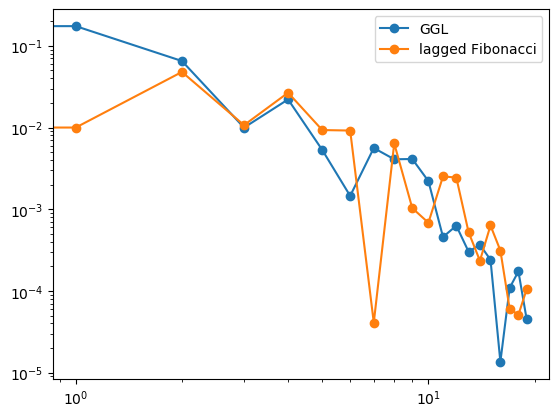

In [88]:
loglog(abs.(corr), marker="o", label="GGL")
loglog(abs.(corr2), marker="o", label="lagged Fibonacci")
#loglog(abs.(corr3), marker="o", label="Mersenne Twister")
legend();

#### Korrelationsverlauf für den "bad generator"

In [89]:
corr4 = Float64[]
for i in 1:20
    n = 2^i
    x1 = my_badgenerator(123456, n)
    c = correlations(x1)
    push!(corr4,c)
end

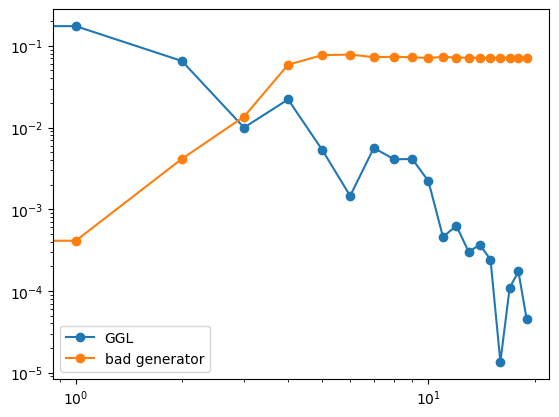

In [90]:
loglog(abs.(corr), marker="o", label="GGL")
loglog(abs.(corr4), marker="o", label="bad generator")
# plot(abs.(corr4), marker="o", label="bad generator")
legend();

<hr/>

## 3. Spektraltests

#### Korrelationen im GGL?

In [103]:
function spectral_test(random_numbers)
    x = Float64[]
    y = Float64[]
    z = Float64[]
    
    for i in 1:length(random_numbers)-2
        if random_numbers[i] < 0.001
            push!(x, random_numbers[i])
            push!(y, random_numbers[i+1])
            push!(z, random_numbers[i+2])
        end
    end
    return x,y,z
end

spectral_test (generic function with 1 method)

In [115]:
x1 = my_GGL(123456, 10000000);

In [116]:
X,Y,Z = spectral_test(x1);

In [117]:
pygui(true)
plot3D(X,Y,Z, zdir="z", marker=".", linestyle="none")
xlim(0, 0.001)
ylim(0,1)
zlim(0,1);

### Sampling auf der Sphäre

[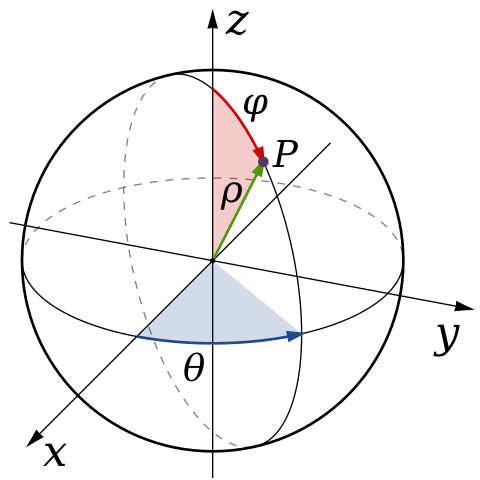](https://de.wikipedia.org/wiki/Kugelkoordinaten)

Definitionen: $\quad \theta$ polarer Winkel, $\quad \phi$ azimutaler Winkel, $\quad r=1$ Radius

Koordinaten:

$\quad x = \sin(\phi) \cdot \cos(\theta)$

$\quad y = \sin(\phi) \cdot \sin(\theta)$

$\quad z = \cos(\phi)$

### Verfahren 1 &mdash; zufälliger polarer und azimutaler Winkel

In [119]:
function sample_sphere(N)
    x = Float64[]
    y = Float64[]
    z = Float64[]
    
    for i in 1:N
        θ = rand()*2*π
        ϕ = rand()*π
        
        push!(x, sin(ϕ)*cos(θ))
        push!(y, sin(ϕ)*sin(θ))
        push!(z, cos(ϕ))      
    end
    return x,y,z
end     

sample_sphere (generic function with 1 method)

In [120]:
X, Y, Z = sample_sphere(2000);

In [122]:
# Display settings
fig = figure()
fig.canvas.manager.window.move(50,125)
gcf().set_size_inches(14, 16)
gcf().clf()
gcf().set_facecolor("white")

# 3D Plot
plot3D(X,Y,Z, zdir="z", marker=".", linestyle="none")
axis("off");

### Verfahren 2 &mdash; zufällige z-Koordinate und polarer Winkel

In [123]:
function sample_sphere2(N)
    x = Float64[]
    y = Float64[]
    z = Float64[]
    
    for i in 1:N
        θ = rand()*2*π
        zz = -1+2*rand()
        
        push!(x, sqrt(1-zz*zz)*cos(θ))
        push!(y, sqrt(1-zz*zz)*sin(θ))
        push!(z, zz)
    end
    return x,y,z
end

sample_sphere2 (generic function with 1 method)

In [124]:
X,Y,Z = sample_sphere2(2000);

In [125]:
# Display settings
fig = figure()
fig.canvas.manager.window.move(50,125)
gcf().set_size_inches(14, 16)
gcf().clf()
gcf().set_facecolor("white")

# 3D Plot
plot3D(X,Y,Z, zdir="z", marker=".", linestyle="none")
axis("off");